In [75]:
import pandas as pd
import numpy as np
import requests
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Read in data
# specimen = pd.read_json('https://api.coronavirus.data.gov.uk/v1/data?filters=areaType=nation;areaName=England&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesBySpecimenDate%22:%22newCasesBySpecimenDate%22,%22cumCasesBySpecimenDate%22:%22cumCasesBySpecimenDate%22%7D&format=json')
temp = pd.read_csv('history_data_england_temperature.csv')
temp_forecast = pd.read_csv('forecast_data_england.csv')

cases = requests.get('https://api.coronavirus.data.gov.uk/v1/data?filters=areaName=United%2520Kingdom;areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesByPublishDate%22:%22newCasesByPublishDate%22,%22cumCasesByPublishDate%22:%22cumCasesByPublishDate%22%7D&format=json')
cases_england = requests.get('https://api.coronavirus.data.gov.uk/v1/data?filters=areaType=nation;areaName=England&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesByPublishDate%22:%22newCasesByPublishDate%22,%22cumCasesByPublishDate%22:%22cumCasesByPublishDate%22%7D&format=json')
cases_scotland = requests.get('https://api.coronavirus.data.gov.uk/v1/data?filters=areaType=nation;areaName=Scotland&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesByPublishDate%22:%22newCasesByPublishDate%22,%22cumCasesByPublishDate%22:%22cumCasesByPublishDate%22%7D&format=json')
cases_wales = requests.get('https://api.coronavirus.data.gov.uk/v1/data?filters=areaType=nation;areaName=Wales&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesByPublishDate%22:%22newCasesByPublishDate%22,%22cumCasesByPublishDate%22:%22cumCasesByPublishDate%22%7D&format=json')
cases_northern_ireland = requests.get('https://api.coronavirus.data.gov.uk/v1/data?filters=areaType=nation;areaName=Northern%2520Ireland&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesByPublishDate%22:%22newCasesByPublishDate%22,%22cumCasesByPublishDate%22:%22cumCasesByPublishDate%22%7D&format=json')

data = cases.json()
jtopy = json.dumps(data['data'])
df_uk = pd.read_json(jtopy)

data_england = cases_england.json()
jtopy_england = json.dumps(data_england['data'])
df_england = pd.read_json(jtopy_england)
df_england.head()

data_scotland = cases_scotland.json()
jtopy_scotland = json.dumps(data_scotland['data'])
df_scotland = pd.read_json(jtopy_scotland)

data_wales = cases_wales.json()
jtopy_wales = json.dumps(data_wales['data'])
df_wales = pd.read_json(jtopy_wales)

data_northern_ireland = cases_northern_ireland.json()
jtopy_northern_ireland = json.dumps(data_northern_ireland['data'])
df_northern_ireland = pd.read_json(jtopy_northern_ireland)

casesgotten = df_uk.sort_values(
    'date').reset_index().drop('index', axis=1).drop('areaType',axis=1).iloc[:]

casesgotten_england = df_england.sort_values(
    'date').reset_index().drop('index', axis=1).drop('areaType',axis=1).iloc[:]

casesgotten_england.head()

casesgotten_scotland = df_scotland.sort_values(
    'date').reset_index().drop('index', axis=1).drop('areaType',axis=1).iloc[:]

casesgotten_wales = df_wales.sort_values(
    'date').reset_index().drop('index', axis=1).drop('areaType',axis=1).iloc[:]

casesgotten_northern_ireland = df_northern_ireland.sort_values(
    'date').reset_index().drop('index', axis=1).drop('areaType',axis=1).iloc[:]

# specimen.head()


# # Convert to datetime
casesgotten['date'] = pd.to_datetime(casesgotten['date'])
casesgotten_england['date'] = pd.to_datetime(casesgotten_england['date'])
casesgotten_scotland['date'] = pd.to_datetime(casesgotten_scotland['date'])
casesgotten_wales['date'] = pd.to_datetime(casesgotten_wales['date'])
casesgotten_northern_ireland['date'] = pd.to_datetime(casesgotten_northern_ireland['date'])

temp['date'] = pd.to_datetime(temp['Date time'])

temp_forecast['date'] = pd.to_datetime(temp_forecast['Date time'])


# # Match dates to specific range
# # specimen = specimen.sort_values(
# #     'date').reset_index().drop('index', axis=1).drop('areaType',axis=1).iloc[:]
# # temp = temp.iloc[:].reset_index().drop('index', axis=1)

# # # Convert to datetime
# # specimen['date'] = pd.to_datetime(specimen['date'])
# # temp['date'] = pd.to_datetime(temp['Date time'])

# Keep wanted columns
columns = ['areaName', 'date', 'newCasesByPublishDate', 'cumCasesByPublishDate']
specimen = casesgotten[columns]
specimen_england = casesgotten_england[columns]
specimen_scotland = casesgotten_scotland[columns]
specimen_wales = casesgotten_wales[columns]
specimen_northern_ireland = casesgotten_northern_ireland[columns]

columns = ['Maximum Temperature', 'Minimum Temperature', 'Temperature',
           'Wind Chill', 'Precipitation', 'Wind Speed', 'Wind Gust', 
           'Cloud Cover', 'Relative Humidity', 'Conditions', 'date']
temp = temp[columns]
temp_forecast = temp_forecast[columns]

# Merge DataFrames
df = pd.merge(specimen,temp, how='left', on='date')
# Merge DataFrames
df_england = pd.merge(specimen_england,temp, how='left', on='date')

df_england.head()
# Merge DataFrames
df_scotland = pd.merge(specimen_scotland,temp, how='left', on='date')
# Merge DataFrames
df_wales = pd.merge(specimen_wales,temp, how='left', on='date')
# Merge DataFrames
df_northern_ireland = pd.merge(specimen_northern_ireland,temp, how='left', on='date')

# Normalize column names
df.rename(columns={'areaName':'country', 'newCasesByPublishDate':'daily_cases', 
                   'cumCasesByPublishDate':'cumulative_cases', 
                   'Maximum Temperature':'max_temp', 'Minimum Temperature':'min_temp', 
                   'Temperature':'avg_temp', 'Wind Chill':'wind_chill', 
                   'Precipitation':'precipitation', 'Wind Speed':'wind_speed', 
                   'Wind Gust':'wind_gust', 'Cloud Cover':'cloudiness',
                   'Relative Humidity':'humidity', 'Conditions':'conditions'}, inplace=True)

# Normalize column names
df_england.rename(columns={'areaName':'country', 'newCasesByPublishDate':'daily_cases', 
                   'cumCasesByPublishDate':'cumulative_cases', 
                   'Maximum Temperature':'max_temp', 'Minimum Temperature':'min_temp', 
                   'Temperature':'avg_temp', 'Wind Chill':'wind_chill', 
                   'Precipitation':'precipitation', 'Wind Speed':'wind_speed', 
                   'Wind Gust':'wind_gust', 'Cloud Cover':'cloudiness',
                   'Relative Humidity':'humidity', 'Conditions':'conditions'}, inplace=True)

# Normalize column names
df_scotland.rename(columns={'areaName':'country', 'newCasesByPublishDate':'daily_cases', 
                   'cumCasesByPublishDate':'cumulative_cases', 
                   'Maximum Temperature':'max_temp', 'Minimum Temperature':'min_temp', 
                   'Temperature':'avg_temp', 'Wind Chill':'wind_chill', 
                   'Precipitation':'precipitation', 'Wind Speed':'wind_speed', 
                   'Wind Gust':'wind_gust', 'Cloud Cover':'cloudiness',
                   'Relative Humidity':'humidity', 'Conditions':'conditions'}, inplace=True)

# Normalize column names
df_wales.rename(columns={'areaName':'country', 'newCasesByPublishDate':'daily_cases', 
                   'cumCasesByPublishDate':'cumulative_cases', 
                   'Maximum Temperature':'max_temp', 'Minimum Temperature':'min_temp', 
                   'Temperature':'avg_temp', 'Wind Chill':'wind_chill', 
                   'Precipitation':'precipitation', 'Wind Speed':'wind_speed', 
                   'Wind Gust':'wind_gust', 'Cloud Cover':'cloudiness',
                   'Relative Humidity':'humidity', 'Conditions':'conditions'}, inplace=True)

# Normalize column names
df_northern_ireland.rename(columns={'areaName':'country', 'newCasesByPublishDate':'daily_cases', 
                   'cumCasesByPublishDate':'cumulative_cases', 
                   'Maximum Temperature':'max_temp', 'Minimum Temperature':'min_temp', 
                   'Temperature':'avg_temp', 'Wind Chill':'wind_chill', 
                   'Precipitation':'precipitation', 'Wind Speed':'wind_speed', 
                   'Wind Gust':'wind_gust', 'Cloud Cover':'cloudiness',
                   'Relative Humidity':'humidity', 'Conditions':'conditions'}, inplace=True)

# Normalize column names
temp_forecast.rename(columns={'Maximum Temperature':'max_temp', 'Minimum Temperature':'min_temp', 
                   'Temperature':'avg_temp', 'Wind Chill':'wind_chill', 
                   'Precipitation':'precipitation', 'Wind Speed':'wind_speed', 
                   'Wind Gust':'wind_gust', 'Cloud Cover':'cloudiness',
                   'Relative Humidity':'humidity', 'Conditions':'conditions'}, inplace=True)


# Set date as index
df = df.set_index('date')
df_england = df_england.set_index('date')
df_scotland = df_scotland.set_index('date')
df_wales = df_wales.set_index('date')
df_northern_ireland = df_northern_ireland.set_index('date')
temp_forecast = temp_forecast.set_index('date')

# Organize columns and drop conditions
df = df[['country', 'avg_temp', 'min_temp', 
 'max_temp', 'humidity', 'cloudiness', 
 'precipitation', 'wind_speed', 'wind_chill', 
 'wind_gust', 'daily_cases', 'cumulative_cases']]

# Organize columns and drop conditions
df_england = df_england[['country', 'avg_temp', 'min_temp', 
 'max_temp', 'humidity', 'cloudiness', 
 'precipitation', 'wind_speed', 'wind_chill', 
 'wind_gust', 'daily_cases', 'cumulative_cases']]

# Organize columns and drop conditions
df_scotland = df_scotland[['country', 'avg_temp', 'min_temp', 
 'max_temp', 'humidity', 'cloudiness', 
 'precipitation', 'wind_speed', 'wind_chill', 
 'wind_gust', 'daily_cases', 'cumulative_cases']]

# Organize columns and drop conditions
df_wales = df_wales[['country', 'avg_temp', 'min_temp', 
 'max_temp', 'humidity', 'cloudiness', 
 'precipitation', 'wind_speed', 'wind_chill', 
 'wind_gust', 'daily_cases', 'cumulative_cases']]

# Organize columns and drop conditions
df_northern_ireland = df_northern_ireland[['country', 'avg_temp', 'min_temp', 
 'max_temp', 'humidity', 'cloudiness', 
 'precipitation', 'wind_speed', 'wind_chill', 
 'wind_gust', 'daily_cases', 'cumulative_cases']]


# Organize columns and drop conditions
temp_forecast = temp_forecast[['avg_temp', 'min_temp', 
 'max_temp', 'humidity', 'cloudiness', 
 'precipitation', 'wind_speed', 'wind_chill', 
 'wind_gust']]

# # Drop the first rows because many have null values for the cumulative field
df = df.iloc[28:]
df_england = df_england.iloc[28:]
df_scotland = df_scotland.iloc[59:]
df_wales = df_wales.iloc[56:]
df_northern_ireland = df_northern_ireland.iloc[63:]

# df = df.iloc[:-10]
# df = df.tail(10)
# df_england = df_england.iloc[:10]
# df_scotland = df_scotland.iloc[:10]
# df_wales = df_wales.iloc[:10]
# df_northern_ireland = df_northern_ireland.iloc[:10]

# df.tail()
df.head()

,country,avg_temp,min_temp,max_temp,humidity,cloudiness,precipitation,wind_speed,wind_chill,wind_gust,daily_cases,cumulative_cases
date,,,,,,,,,,,,
2020-01-31,United Kingdom,51.8,48.5,54.6,86.02,0.8,0.00,15.9,43.2,31.1,2,2.0
2020-02-01,United Kingdom,50.6,45.8,53.0,72.13,0.4,0.04,25.8,39.9,43.8,0,2.0
2020-02-02,United Kingdom,51.0,44.0,56.4,80.55,0.6,0.03,23.3,39.3,38.0,0,2.0
2020-02-03,United Kingdom,49.2,42.2,52.1,73.10,0.4,0.01,17.4,34.8,34.4,0,2.0
2020-02-04,United Kingdom,45.2,41.1,49.4,68.87,0.4,0.01,21.0,32.3,39.1,0,2.0


print(df.shape)

In [77]:
print(df.shape)

(244, 12)


In [78]:
# Drop wind chill and wind gust because too many missing values to just drop row
df.dropna(axis=1, inplace=True)
df.info()

df_england.dropna(axis=1, inplace=True)
df_england.info()

df_scotland.dropna(axis=1, inplace=True)
df_scotland.info()

df_wales.dropna(axis=1, inplace=True)
df_wales.info()

df_northern_ireland.dropna(axis=1, inplace=True)
df_northern_ireland.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2020-01-31 to 2020-09-30
Data columns (total 10 columns):
country             244 non-null object
avg_temp            244 non-null float64
min_temp            244 non-null float64
max_temp            244 non-null float64
humidity            244 non-null float64
cloudiness          244 non-null float64
precipitation       244 non-null float64
wind_speed          244 non-null float64
daily_cases         244 non-null int64
cumulative_cases    244 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 21.0+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2020-01-31 to 2020-09-30
Data columns (total 10 columns):
country             244 non-null object
avg_temp            244 non-null float64
min_temp            244 non-null float64
max_temp            244 non-null float64
humidity            244 non-null float64
cloudiness          244 non-null float64
precipitation       244 non-null floa

/Users/n/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/__init__.py:62: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


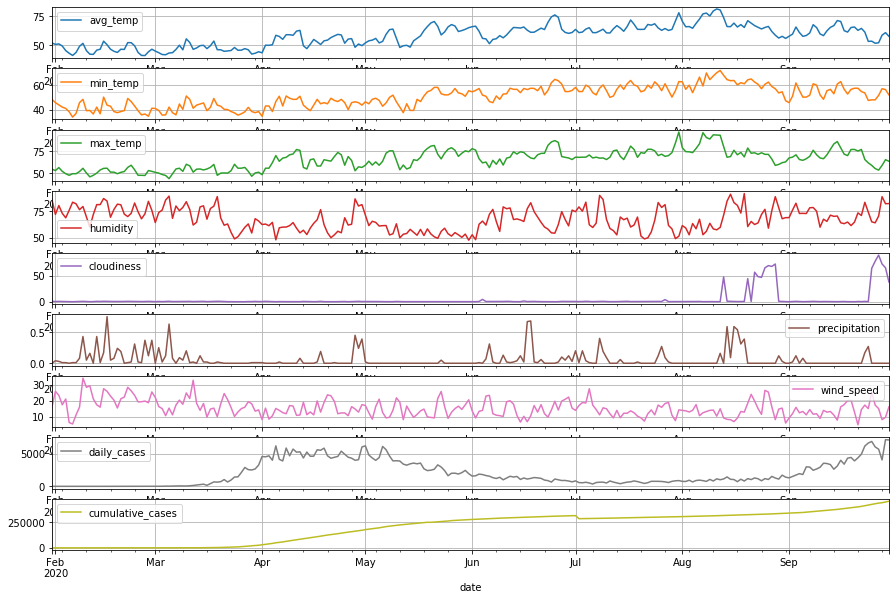

In [79]:
# Daily changes
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
df.plot(ax=ax, subplots=True, grid=True)
ax.set_ylabel('daily changes')
ax.set_xlabel('time')
plt.show()

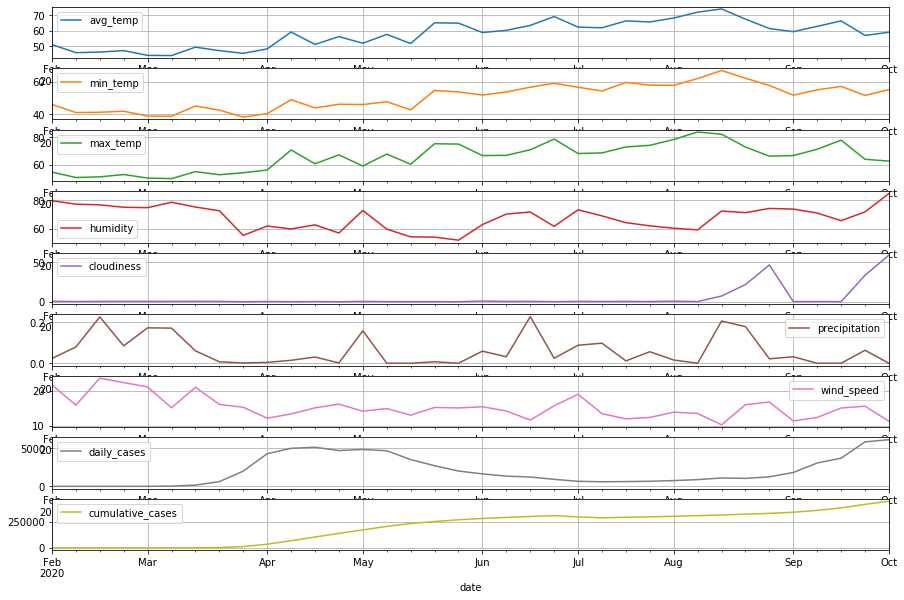

In [80]:
# Weekly changes
weekly = df.resample('W').mean()
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
weekly.plot(ax=ax, subplots=True, grid=True)
ax.set_ylabel('daily changes')
ax.set_xlabel('time')
plt.show()

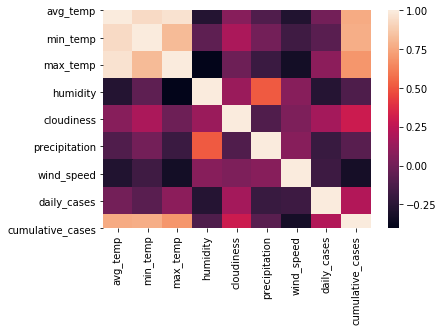

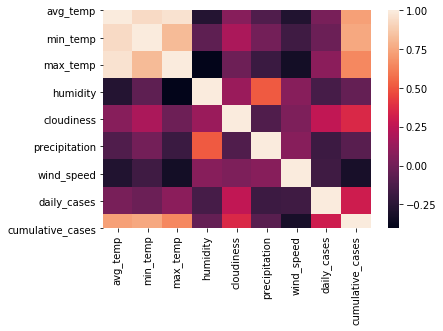

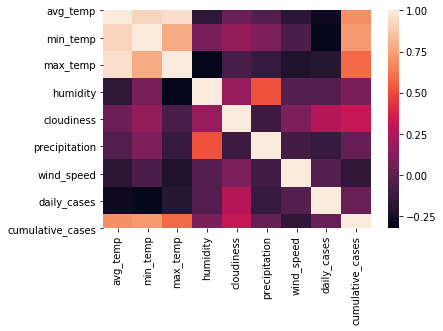

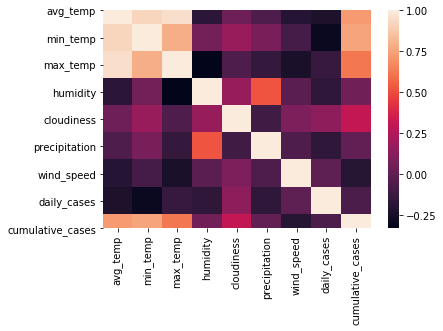

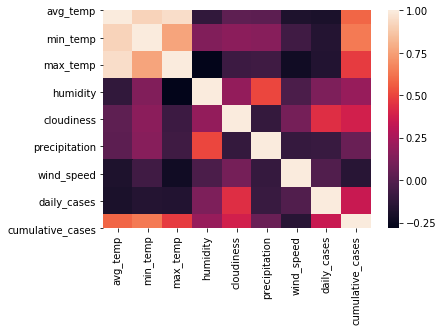

,avg_temp,min_temp,max_temp,humidity,cloudiness,precipitation,wind_speed,daily_cases,cumulative_cases
avg_temp,1.000000,0.918231,0.951688,-0.113691,0.031457,0.024915,-0.178007,-0.188257,0.588220
min_temp,0.918231,1.000000,0.769307,0.136930,0.168428,0.156718,-0.061999,-0.159424,0.643677
max_temp,0.951688,0.769307,1.000000,-0.281534,-0.078556,-0.069921,-0.221539,-0.165769,0.479369
humidity,-0.113691,0.136930,-0.281534,1.000000,0.189839,0.506918,-0.029509,0.126513,0.199975
cloudiness,0.031457,0.168428,-0.078556,0.189839,1.000000,-0.103179,0.099401,0.438697,0.384008
precipitation,0.024915,0.156718,-0.069921,0.506918,-0.103179,1.000000,-0.099672,-0.088465,0.063997
wind_speed,-0.178007,-0.061999,-0.221539,-0.029509,0.099401,-0.099672,1.000000,-0.006809,-0.141894
daily_cases,-0.188257,-0.159424,-0.165769,0.126513,0.438697,-0.088465,-0.006809,1.000000,0.351398
cumulative_cases,0.588220,0.643677,0.479369,0.199975,0.384008,0.063997,-0.141894,0.351398,1.000000


In [81]:
correlation = df.corr()
sns.heatmap(correlation)
plt.show()
df.corr()

correlation = df_england.corr()
sns.heatmap(correlation)
plt.show()
df_england.corr()

correlation = df_scotland.corr()
sns.heatmap(correlation)
plt.show()
df_scotland.corr()

correlation = df_wales.corr()
sns.heatmap(correlation)
plt.show()
df_wales.corr()

correlation = df_northern_ireland.corr()
sns.heatmap(correlation)
plt.show()
df_northern_ireland.corr()

In [82]:
df.daily_cases.sort_values().unique()

array([   0,    1,    2,    4,    5,    6,   11,   12,   29,   34,   46,
         50,   52,   65,   83,  134,  152,  207,  264,  330,  352,  398,
        407,  445,  512,  516,  530,  538,  544,  560,  576,  580,  581,
        624,  630,  642,  643,  650,  653,  665,  670,  676,  685,  687,
        689,  713,  714,  726,  743,  745,  758,  761,  763,  767,  768,
        769,  812,  815,  816,  820,  827,  829,  846,  853,  871,  874,
        880,  890,  892,  901,  938,  950,  958,  967, 1003, 1006, 1009,
       1033, 1035, 1040, 1048, 1056, 1062, 1077, 1089, 1108, 1115, 1118,
       1129, 1148, 1160, 1182, 1184, 1205, 1218, 1221, 1266, 1276, 1279,
       1288, 1295, 1326, 1346, 1387, 1406, 1425, 1427, 1441, 1452, 1508,
       1514, 1522, 1541, 1557, 1570, 1613, 1625, 1650, 1715, 1735, 1805,
       1813, 1871, 1887, 1936, 1940, 2004, 2013, 2095, 2129, 2409, 2412,
       2445, 2460, 2472, 2502, 2556, 2615, 2621, 2659, 2665, 2684, 2890,
       2919, 2948, 2959, 2988, 3105, 3242, 3250, 32

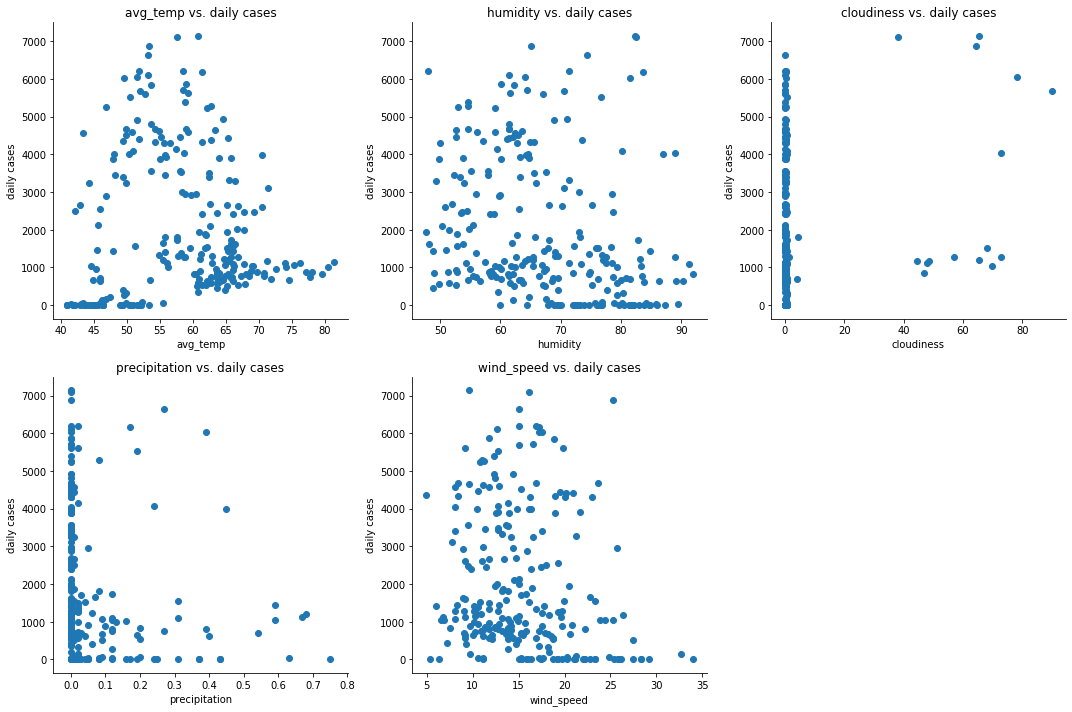

In [83]:
comparisons = ['avg_temp', 'humidity', 'cloudiness', 'precipitation', 'wind_speed']


# Features vs. Daily Cases
fig = plt.figure(figsize=(15,10))
for i, comparison in enumerate(comparisons):
    ax = fig.add_subplot(2,3,i+1)
    ax.set_xlabel('{}'.format(comparison))
    ax.set_ylabel('daily cases')
    ax.set_title('{} vs. daily cases'.format(comparison))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.scatter(df[comparison], df.daily_cases)
    
plt.tight_layout()
plt.show()

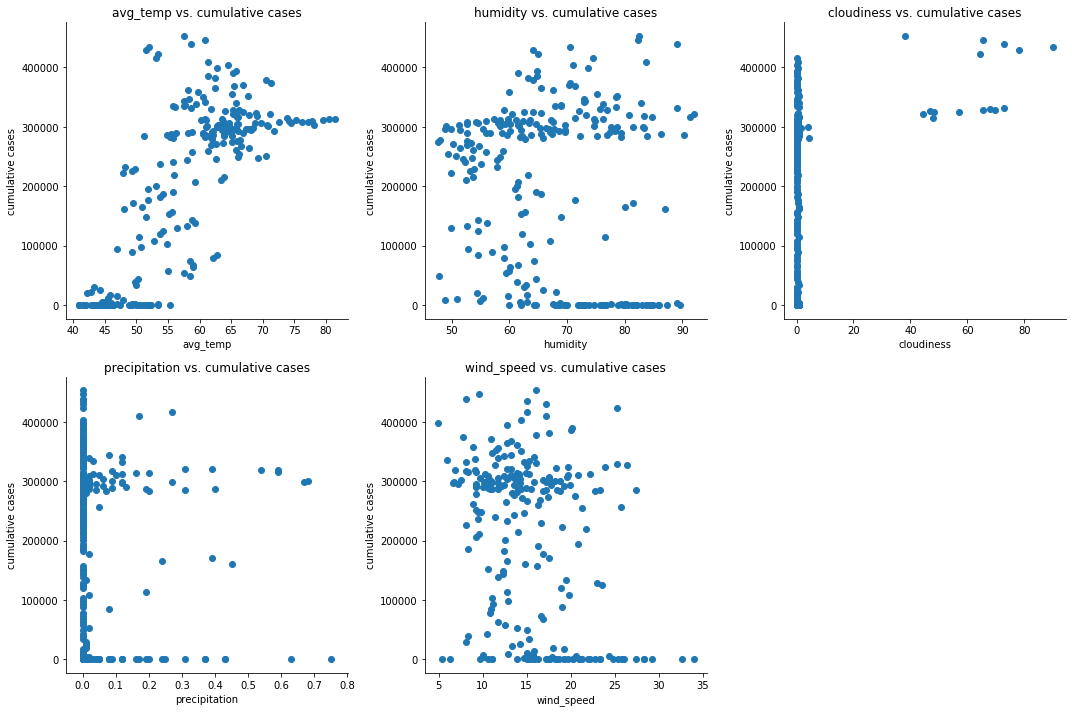

In [84]:
# Features vs. Cumulative Cases
fig = plt.figure(figsize=(15,10))
for i, comparison in enumerate(comparisons):
    ax = fig.add_subplot(2,3,i+1)
    ax.set_xlabel('{}'.format(comparison))
    ax.set_ylabel('cumulative cases')
    ax.set_title('{} vs. cumulative cases'.format(comparison))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.scatter(df[comparison], df.cumulative_cases)
    
plt.tight_layout()
plt.show()

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools

# Set up X and y
# X is what it is training
X = df.drop(['country', 'daily_cases', 'cumulative_cases'], axis=1)

# y is what it is testing against
y1 = df.daily_cases
y2 = df.cumulative_cases


# # England
# # Set up X and y
# # X is what it is training
# X = df_england.drop(['country', 'daily_cases', 'cumulative_cases'], axis=1)

# # y is what it is testing against
# y1 = df_england.daily_cases
# y2 = df_england.cumulative_cases


# # Scotland
# # Set up X and y
# # X is what it is training
# X = df_scotland.drop(['country', 'daily_cases', 'cumulative_cases'], axis=1)

# # y is what it is testing against
# y1 = df_scotland.daily_cases
# y2 = df_scotland.cumulative_cases

# # Wales
# # Set up X and y
# # X is what it is training
# X = df_wales.drop(['country', 'daily_cases', 'cumulative_cases'], axis=1)

# # y is what it is testing against
# y1 = df_wales.daily_cases
# y2 = df_wales.cumulative_cases

# # Northern Ireland
# # Set up X and y
# # X is what it is training
# X = df_northern_ireland.drop(['country', 'daily_cases', 'cumulative_cases'], axis=1)

# # y is what it is testing against
# y1 = df_northern_ireland.daily_cases
# y2 = df_northern_ireland.cumulative_cases



# # Set up X and y
# # X is what it is training
# X_england = df_england.drop(['country', 'daily_cases', 'cumulative_cases'], axis=1)

# # y is what it is testing against
# y1_england = df.daily_cases
# y2_england = df_england.cumulative_cases





# # Set up X and y
# # X is what it is training
# X_scotland = df_scotland.drop(['country', 'daily_cases', 'cumulative_cases'], axis=1)

# # y is what it is testing against
# y1_scotland = df_scotland.daily_cases
# y2_scotland = df_scotland.cumulative_cases




# # Set up X and y
# # X is what it is training
# X_wales = df_wales.drop(['country', 'daily_cases', 'cumulative_cases'], axis=1)

# # y is what it is testing against
# y1_wales = df_wales.daily_cases
# y2_wales = df_wales.cumulative_cases



# # Set up X and y
# # X is what it is training
# X_northern_ireland = df_northern_ireland.drop(['country', 'daily_cases', 'cumulative_cases'], axis=1)

# # y is what it is testing against
# y1_northern_ireland = df_northern_ireland.daily_cases
# y2_northern_ireland = df_northern_ireland.cumulative_cases

In [86]:
# Daily cases
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=10)

# Cumulative cases
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=10)

# Make sure X sets are equal in order to use one set

pd.testing.assert_frame_equal(X_train, X2_train) 
pd.testing.assert_frame_equal(X_test, X2_test) 
    
# Normalize training data
scaler = StandardScaler().fit(X_train)
Xn_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)

# Normalize testing data by using mean and SD of training set
Xn_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [87]:
# For daily and cumulative cases
y_values = [y1, y2]

In [88]:
daily_features = ['humidity', 'avg_temp', 'wind_speed', 'cloudiness']
cumulative_features = ['avg_temp', 'max_temp', 'wind_speed', 'humidity']

daily_cases_score_table = pd.DataFrame(columns= ['r2_train','r2_test','mse_train','mse_test'])
cumulative_cases_score_table = pd.DataFrame(columns= ['r2_train','r2_test','mse_train','mse_test'])

# define function for plotting the results
def compute_result(algo, pred_train, pred_test, y_train, y_test):
    """compute and log the performance for both training and test sets"""
    
    # compute the performance
    r2_train = r2_score(y_train, pred_train)
    r2_test = r2_score(y_test, pred_test)
    mse_train = mean_squared_error(y_train, pred_train)
    mse_test = mean_squared_error(y_test, pred_test)
    
    # log the performance
    daily_cases_score_table.loc[algo,:] = r2_train, r2_test, mse_train, mse_test
    
# define function for plotting the results
def compute_result2(algo, pred_train, pred_test, y_train, y_test):
    """compute and log the performance for both training and test sets"""
    
    # compute the performance
    r2_train = r2_score(y_train, pred_train)
    r2_test = r2_score(y_test, pred_test)
    mse_train = mean_squared_error(y_train, pred_train)
    mse_test = mean_squared_error(y_test, pred_test)
    
    # log the performance
    cumulative_cases_score_table.loc[algo,:] = r2_train, r2_test, mse_train, mse_test

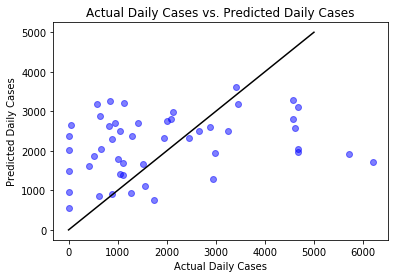

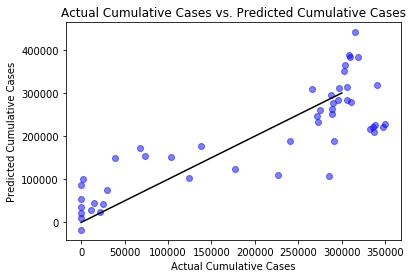

In [89]:
# Linear Regression
lr = LinearRegression()
lr.fit(Xn_train[daily_features], y1_train)
train_predict = lr.predict(Xn_train[daily_features])
test_predict = lr.predict(Xn_test[daily_features])
compute_result('LinearRegression', train_predict, test_predict, y1_train, y1_test)

plt.scatter(y1_test, test_predict, color='blue', alpha=0.5)
plt.xlabel('Actual Daily Cases')
plt.ylabel('Predicted Daily Cases')
plt.title('Actual Daily Cases vs. Predicted Daily Cases')
plt.plot([0, 5000], [0, 5000], 'k-')
plt.show()

lr = LinearRegression()
lr.fit(Xn_train[cumulative_features], y2_train)
train_predict = lr.predict(Xn_train[cumulative_features])
test_predict = lr.predict(Xn_test[cumulative_features])
compute_result2('LinearRegression', train_predict, test_predict, y2_train, y2_test)

plt.scatter(y2_test, test_predict, color='blue', alpha=0.5)
plt.xlabel('Actual Cumulative Cases')
plt.ylabel('Predicted Cumulative Cases')
plt.title('Actual Cumulative Cases vs. Predicted Cumulative Cases')
plt.plot([0, 300000], [0, 300000], 'k-')
plt.show()

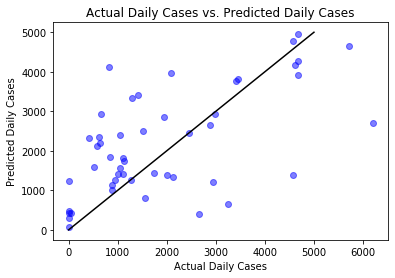

In [101]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(Xn_train[daily_features], y1_train)
train_predict = rf.predict(Xn_train[daily_features])
test_predict = rf.predict(Xn_test[daily_features])
compute_result('RandomForestRegressor', train_predict, test_predict, y1_train, y1_test)

# importance = pd.DataFrame(columns= ['importance'])

# # importance['importance'] = rf.feature_importances_
# feature_names = daily_features
# importance_frame = pd.DataFrame()
# importance_frame['Features'] = daily_features
# importance_frame['Importance'] = rf.feature_importances_
# importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)


import pickle

# save the model to disk
filename = 'randomforest-model-united-kingdom-daily_2.pkl'
pickle.dump(rf, open(filename, 'wb'))


plt.scatter(y1_test, test_predict, color='blue', alpha=0.5)
plt.xlabel('Actual Daily Cases')
plt.ylabel('Predicted Daily Cases')
plt.title('Actual Daily Cases vs. Predicted Daily Cases')
plt.plot([0, 5000], [0, 5000], 'k-')
plt.show()



# rf = RandomForestRegressor()
# rf.fit(Xn_train[cumulative_features], y2_train)
# train_predict = rf.predict(Xn_train[cumulative_features])
# test_predict = rf.predict(Xn_test[cumulative_features])
# compute_result2('RandomForestRegressor', train_predict, test_predict, y2_train, y2_test)

# plt.scatter(y2_test, test_predict, color='blue', alpha=0.5)
# plt.xlabel('Actual Cumulative Cases')
# plt.ylabel('Predicted Cumulative Cases')
# plt.title('Actual Cumulative Cases vs. Predicted Cumulative Cases')
# plt.plot([0, 300000], [0, 300000], 'k-')
# plt.show()

In [91]:
importance_frame

,Features,Importance
3,cloudiness,0.173947
2,wind_speed,0.175429
0,humidity,0.221360
1,avg_temp,0.429263


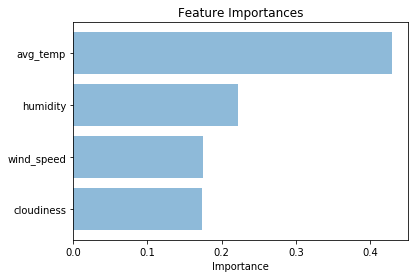

In [92]:
plt.barh([1,2,3,4], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

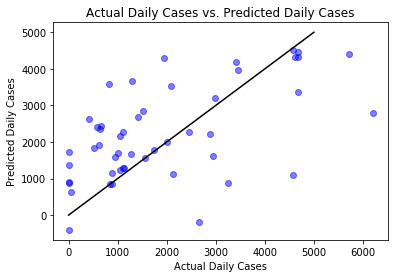

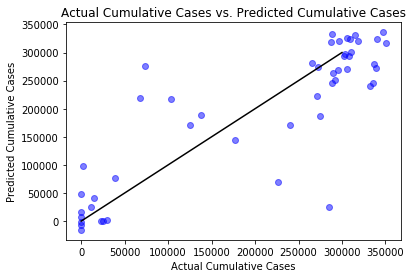

In [93]:
# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(Xn_train[daily_features], y1_train)
train_predict = gb.predict(Xn_train[daily_features])
test_predict = gb.predict(Xn_test[daily_features])
compute_result('GradientBoostingRegressor', train_predict, test_predict, y1_train, y1_test)

plt.scatter(y1_test, test_predict, color='blue', alpha=0.5)
plt.xlabel('Actual Daily Cases')
plt.ylabel('Predicted Daily Cases')
plt.title('Actual Daily Cases vs. Predicted Daily Cases')
plt.plot([0, 5000], [0, 5000], 'k-')
plt.show()

gb = GradientBoostingRegressor()
gb.fit(Xn_train[cumulative_features], y2_train)
train_predict = gb.predict(Xn_train[cumulative_features])
test_predict = gb.predict(Xn_test[cumulative_features])
compute_result2('GradientBoostingRegressor', train_predict, test_predict, y2_train, y2_test)

plt.scatter(y2_test, test_predict, color='blue', alpha=0.5)
plt.xlabel('Actual Cumulative Cases')
plt.ylabel('Predicted Cumulative Cases')
plt.title('Actual Cumulative Cases vs. Predicted Cumulative Cases')
plt.plot([0, 300000], [0, 300000], 'k-')
plt.show()

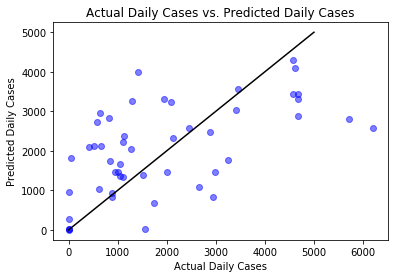

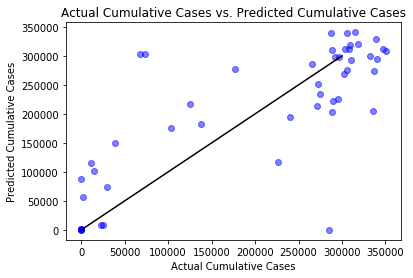

In [94]:
# KNearest Neighbours
knn = KNeighborsRegressor()
knn.fit(Xn_train[daily_features], y1_train)
train_predict = knn.predict(Xn_train[daily_features])
test_predict = knn.predict(Xn_test[daily_features])
compute_result('KNeighborsRegressor', train_predict, test_predict, y1_train, y1_test)

plt.scatter(y1_test, test_predict, color='blue', alpha=0.5)
plt.xlabel('Actual Daily Cases')
plt.ylabel('Predicted Daily Cases')
plt.title('Actual Daily Cases vs. Predicted Daily Cases')
plt.plot([0, 5000], [0, 5000], 'k-')
plt.show()

import pickle

# save the model to disk
filename = 'knn-model-united-kingdom-daily.pkl'
pickle.dump(knn, open(filename, 'wb'))

knn = KNeighborsRegressor()
knn.fit(Xn_train[cumulative_features], y2_train)
train_predict = knn.predict(Xn_train[cumulative_features])
test_predict = knn.predict(Xn_test[cumulative_features])
compute_result2('KNeighborsRegressor', train_predict, test_predict, y2_train, y2_test)

plt.scatter(y2_test, test_predict, color='blue', alpha=0.5)
plt.xlabel('Actual Cumulative Cases')
plt.ylabel('Predicted Cumulative Cases')
plt.title('Actual Cumulative Cases vs. Predicted Cumulative Cases')
plt.plot([0, 300000], [0, 300000], 'k-')
plt.show()

import pickle

# save the model to disk
filename = 'knn-model-united-kingdom-cumulative.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [95]:
daily_cases_score_table

,r2_train,r2_test,mse_train,mse_test
LinearRegression,0.181772,0.0119881,3.06129e+06,2.64407e+06
RandomForestRegressor,0.89692,0.308366,385659,1.85092e+06
GradientBoostingRegressor,0.844985,0.251236,579968,2.00381e+06
KNeighborsRegressor,0.535123,0.312256,1.73927e+06,1.84051e+06


In [66]:
cumulative_cases_score_table

,r2_train,r2_test,mse_train,mse_test
LinearRegression,0.626583,0.700909,7.59923e+09,5.19355e+09
GradientBoostingRegressor,0.961459,0.710452,7.84333e+08,5.02785e+09
KNeighborsRegressor,0.79779,0.612739,4.11508e+09,6.72458e+09


In [96]:
# Pretend this is tomorrow's data

# tomorrow_data = X[222:223]
daily_features = ['humidity', 'avg_temp', 'wind_speed', 'cloudiness']
# tomorrow_data = temp_forecast[0:1]
# tomorrow_data

In [97]:
# Pretend this is tomorrow's actual case
tomorrow_daily = y1[243:244]
tomorrow_daily

date
2020-09-30    7108
Name: daily_cases, dtype: int64

In [98]:
# Pretend this is tomorrow's actual cumulative
tomorrow_cumulative = y2[243:244]
tomorrow_cumulative

date
2020-09-30    453264.0
Name: cumulative_cases, dtype: float64

In [99]:
# # KNearest Neighbours
# knn = KNeighborsRegressor()
# # knn.fit(X[daily_features], y1)
# predict = knn.predict(tomorrow_data[daily_features])
# print(predict)

# knn = KNeighborsRegressor()
# knn.fit(X[cumulative_features], y2)
# predict2 = knn.predict(tomorrow_data[cumulative_features])
# print(predict2)

In [103]:
# Pretend this is tomorrow's data

# tomorrow_data = X[242:243]
daily_features = ['humidity', 'min_temp', 'wind_speed', 'cloudiness']

for i in range(1, 12):
    tomorrow_data = temp_forecast[i:i+1]

# tomorrow_data = temp_forecast[1:3]
# tomorrow_data

# for index, row in X.iterrows():
#     tomorrow_data = row
    
# tomorrow_data = temp_forecast[0:1]
# tomorrow_data

# Load the model that was saved to the disk
    filename = 'knn-model-united-kingdom-daily.pkl'
    loaded_model_knn = pickle.load(open(filename, 'rb'))

#     print(tomorrow_data)
#     print(daily_features)

    print(tomorrow_data[daily_features])
    
    print(tomorrow_data.index)

# knn_loaded_model_england = loaded_model_knn.fit(X[daily_features], y1)

    predict = loaded_model_knn.predict(tomorrow_data[daily_features])
    predictions_gotten = [tomorrow_data.index, predict]
    print(predictions_gotten)




# Pretend this is tomorrow's data

# tomorrow_data = X[242:243]
daily_features = ['humidity', 'avg_temp', 'wind_speed', 'cloudiness']

for i in range(1, 12):
    tomorrow_data = temp_forecast[i:i+1]

# tomorrow_data = temp_forecast[1:3]
# tomorrow_data

# for index, row in X.iterrows():
#     tomorrow_data = row
    
# tomorrow_data = temp_forecast[0:1]
# tomorrow_data

# Load the model that was saved to the disk
    filename = 'randomforest-model-united-kingdom-daily_2.pkl'
    loaded_model_knn = pickle.load(open(filename, 'rb'))

#     print(tomorrow_data)
#     print(daily_features)

    print(tomorrow_data[daily_features])
    
    print(tomorrow_data.index)

# knn_loaded_model_england = loaded_model_knn.fit(X[daily_features], y1)

    predict = loaded_model_knn.predict(tomorrow_data[daily_features])
    predictions_gotten = [tomorrow_data.index, predict]
    print(predictions_gotten)


   



            humidity  min_temp  wind_speed  cloudiness
date                                                  
2020-10-01      66.4      50.4         7.4        73.3
DatetimeIndex(['2020-10-01'], dtype='datetime64[ns]', name='date', freq=None)
[DatetimeIndex(['2020-10-01'], dtype='datetime64[ns]', name='date', freq=None), array([3868.])]
            humidity  min_temp  wind_speed  cloudiness
date                                                  
2020-10-02      71.2      51.2         8.4        85.8
DatetimeIndex(['2020-10-02'], dtype='datetime64[ns]', name='date', freq=None)
[DatetimeIndex(['2020-10-02'], dtype='datetime64[ns]', name='date', freq=None), array([3868.])]
            humidity  min_temp  wind_speed  cloudiness
date                                                  
2020-10-03      83.2      50.6         7.9        89.4
DatetimeIndex(['2020-10-03'], dtype='datetime64[ns]', name='date', freq=None)
[DatetimeIndex(['2020-10-03'], dtype='datetime64[ns]', name='date', freq=None),